# Data Overview
- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Male': Gender customer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad
- 'City': City of consumer
- 'Province' : Province of Consumer
- 'category': Headline of the advertisement

Dataset Source [https://www.kaggle.com/datasets/rizdelhi/my-datasets]



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv("Clicked Ads Dataset.csv").drop(axis=1, columns='Unnamed: 0')
print(df.shape)
df.head()

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# EDA

## Descriptive Statistic

**Info Data**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


**Describe**
- Berdasarkan nilai mean dan median dari beberapa fitur, terdapat perbedaan antara mean dan median yang menunjukkan distribusi skewed pada data namun tidak significant
- Data menunjukkan mayoritas customer tinggal di provinsi DKI Jakarta dan Category Ads terbanyak berasal dari Iklan Otomotif


In [36]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [37]:
df.select_dtypes(include='object').describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


**Duplicated Data**

In [38]:
df.duplicated().sum()

0

**Null Value**

In [39]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

## Univariate Analysis

**Distribusi Data Numerical**

- Mayoritas data memiliki distribusi skewed namun masih dalam batas wajar / Mendekati normal.
- Terdapat outlier pada fitur 'Area Income' sehingga perlu dilakukan remove outlier pada data preprocessing nantinya.
- Jumlah Value pada fitur Target (Clicked on Ad) sudah Balance

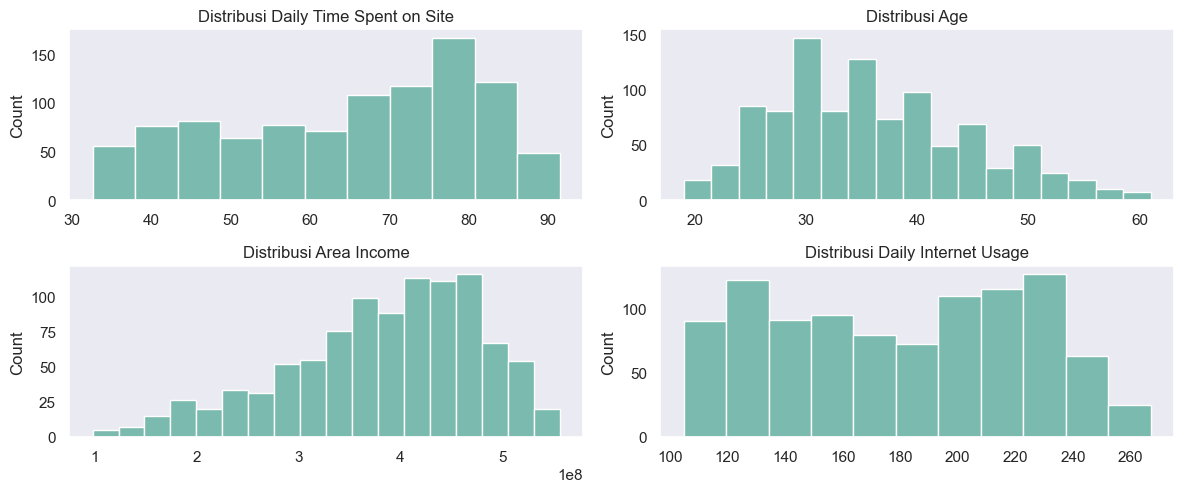

In [40]:
numeric = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
plt.figure(figsize=(12,7))
sns.set_theme(style='dark', palette='dark:#5A9_r')
for i in range(len(numeric)):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df, x=numeric[i])
    plt.title(f'Distribusi {numeric[i]}')
    plt.xlabel('')
plt.tight_layout()


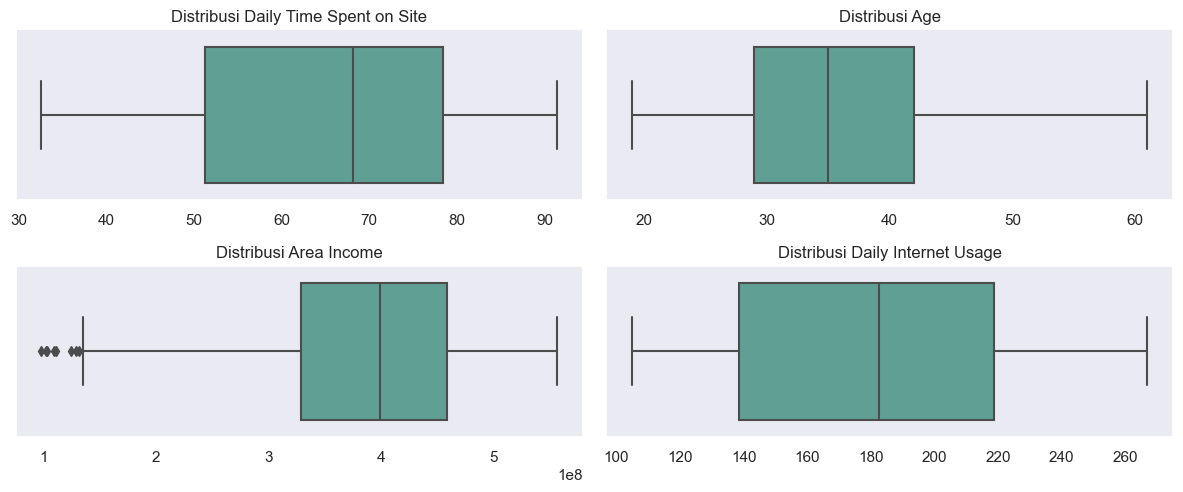

In [41]:
numeric = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
plt.figure(figsize=(12,7))
sns.set_theme(style='dark', palette='dark:#5A9_r')
for i in range(len(numeric)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, x=numeric[i])
    plt.title(f'Distribusi {numeric[i]}')
    plt.xlabel('')
plt.tight_layout()

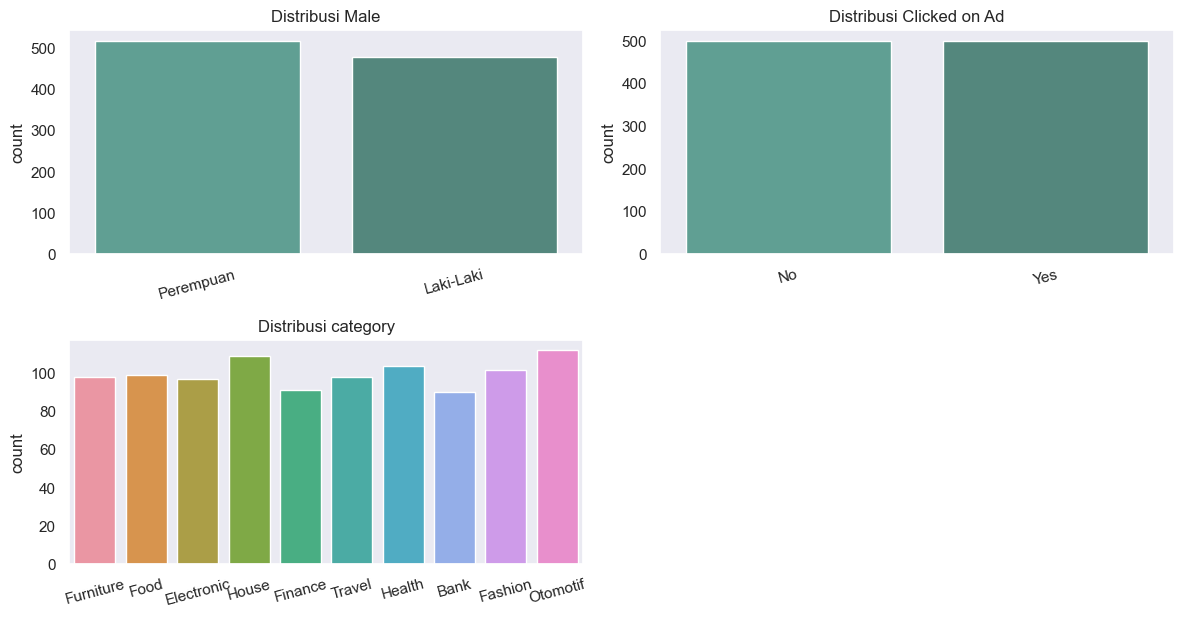

In [42]:
categorical = ['Male','Clicked on Ad','category']
plt.figure(figsize=(12,9))
sns.set_theme(style='dark', palette='dark:#5A9_r')
for i in range(len(categorical)):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=categorical[i])
    plt.title(f'Distribusi {categorical[i]}')
    plt.xlabel('')
    plt.xticks(rotation=15)
plt.tight_layout()

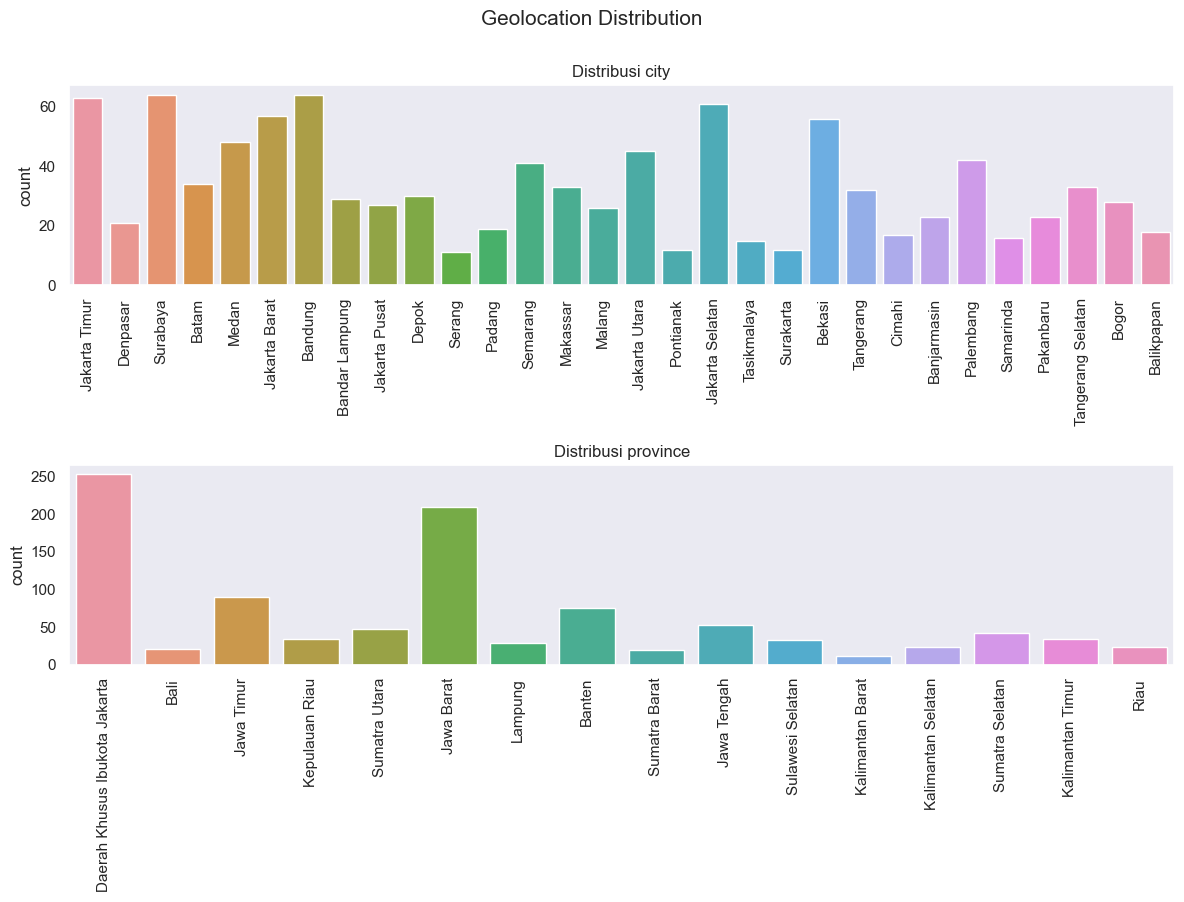

In [43]:
geolocation = ['city','province']
plt.figure(figsize=(12,9))
sns.set_theme(style='dark', palette='dark:#5A9_r')
for i in range(len(geolocation)):
    plt.subplot(2,1,i+1)
    sns.countplot(data=df, x=geolocation[i])
    plt.title(f'Distribusi {geolocation[i]}')
    plt.xlabel('')
    plt.xticks(rotation=90)
plt.suptitle('Geolocation Distribution', fontsize=15, y=1)
plt.tight_layout()

## Bivariate Analysis

**Umur Terhadap Daily Time Spent on Site**
- Customer dengan Umur 20 - 40 Tahun yang melakukan Clicked Ads rata rata menghabiskan waktu 30 - 60 menit untuk mengunjungi website perusahaan. Namun pada umur tersebut customer yang menghabiskan waktu 60 - 90 menit cenderung tidak melakukan Clicked on Ads.
- Customer dengan umur 20 - 60 tahun yang tertarik melakukan Clicked Ads akan menghabiskan waktu 30 - 60 menit dalam mengunjungi situs website perusahaan.
- Summary : Rata Rata Customer yang menggunakan Internet dibawah 180 Menit, dan menggunakan situs website perusahaan Dibawah 70 Menit, sangat berpotensi dalam melakukan clicked terhadap iklan / Ads yang ditawarkan perusahaan.

Text(0.5, 1, 'Distribusi Umur Terhadap Waktu Penggunaan Website dan Internet')

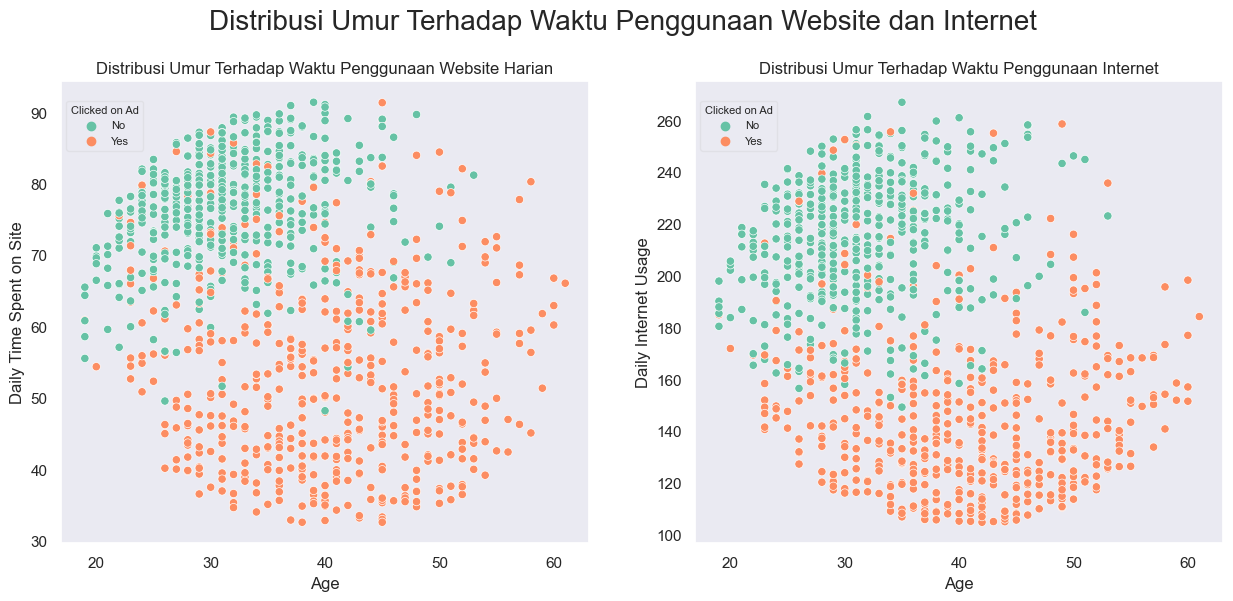

In [44]:
sns.set_theme(style='dark', palette='Set2')
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot( data=df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad' )
plt.legend(title='Clicked on Ad', bbox_to_anchor=(0, 0.97), loc='upper left',framealpha=0.3, fontsize=8,title_fontsize=8)
plt.title('Distribusi Umur Terhadap Waktu Penggunaan Website Harian')

plt.subplot(1,2,2)
sns.scatterplot( data=df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad' )
plt.legend(title='Clicked on Ad', bbox_to_anchor=(0, 0.97), loc='upper left',framealpha=0.3, fontsize=8,title_fontsize=8)
plt.title('Distribusi Umur Terhadap Waktu Penggunaan Internet')
plt.suptitle('Distribusi Umur Terhadap Waktu Penggunaan Website dan Internet', fontsize=20, y=1)

Text(0.5, 1.05, 'Distribusi Waktu Penggunaan Internet \nTerhadap Waktu Penggunaan Website')

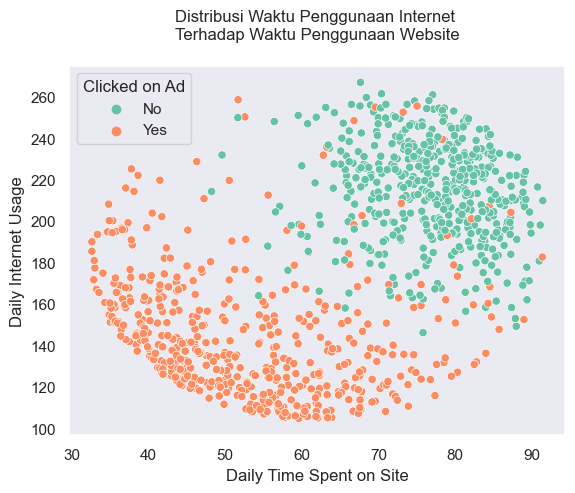

In [45]:
sns.scatterplot( data=df, x='Daily Time Spent on Site', y='Daily Internet Usage', hue='Clicked on Ad' )
plt.title('Distribusi Waktu Penggunaan Internet \nTerhadap Waktu Penggunaan Website', y=1.05)

**Category Based on Clicked Ads**
- Kategori iklan yang paling banyak diklik oleh customer merupakan iklan Otomotif
Kategori iklan Kesehatan merupakan iklan dengan jumlah Un Clicked terbanyak.

Text(0.5, 0.98, 'Category Ads Dengan Jumlah Clicked Terbanyak')

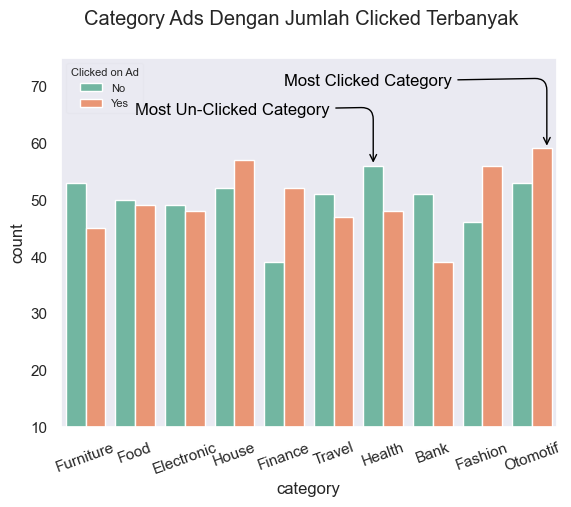

In [46]:
max_clicked_category = df[df['Clicked on Ad']=='Yes'][['category']].value_counts().max()
max_unclicked_category = df[df['Clicked on Ad']=='No'][['category']].value_counts().max()

sns.set_theme(style='dark', palette='Set2')
sns.countplot(data=df, x='category', hue='Clicked on Ad')
plt.ylim(10,75)
plt.xticks(rotation=20)
plt.legend(title='Clicked on Ad', bbox_to_anchor=(0, 1), loc='upper left',framealpha=0.1, fontsize=8,title_fontsize=8)
plt.annotate(xy=(9.3,max_clicked_category),xytext=(4,70), text='Most Clicked Category',
              arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=1,angleB=90,rad=12", color='black'),color='black')

plt.annotate(xy=(5.8,max_unclicked_category),xytext=(1,65), text='Most Un-Clicked Category',
              arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=1,angleB=90,rad=12", color='black'),color='black')

plt.suptitle('Category Ads Dengan Jumlah Clicked Terbanyak')

## Multivariate Analysis
- Terdapat korelasi positif yang cukup kuat antara Durasi Penggunaan internet dan Durasi Penggunaan Website. Artinya semakin banyak waktu customer yang digunakan untuk menggunakan internet, maka semakin tinggi juga durasi customer tersebut menggunakan situs website.
- Terdapat korelasi positif antara Income customer terhadap Durasi waktu penggunaan internet dan durasi penggunaan website perusahaan. Artinya semakin tinggi gaji / income customer maka semakin lama juga durasi customer tersebut dalam menggunakan internet dan website.
- Terdapat korelasi negative antara Umur terhadap Durasi Penggunaan Website maupun Durasi Penggunaan internet. Artinya semakin Tua Umur customer, maka semakin sedikit durasi customer untuk menggunakan website maupun internet.


Text(0.5, 1.0, 'Heatmap Korelasi Antara Fitur')

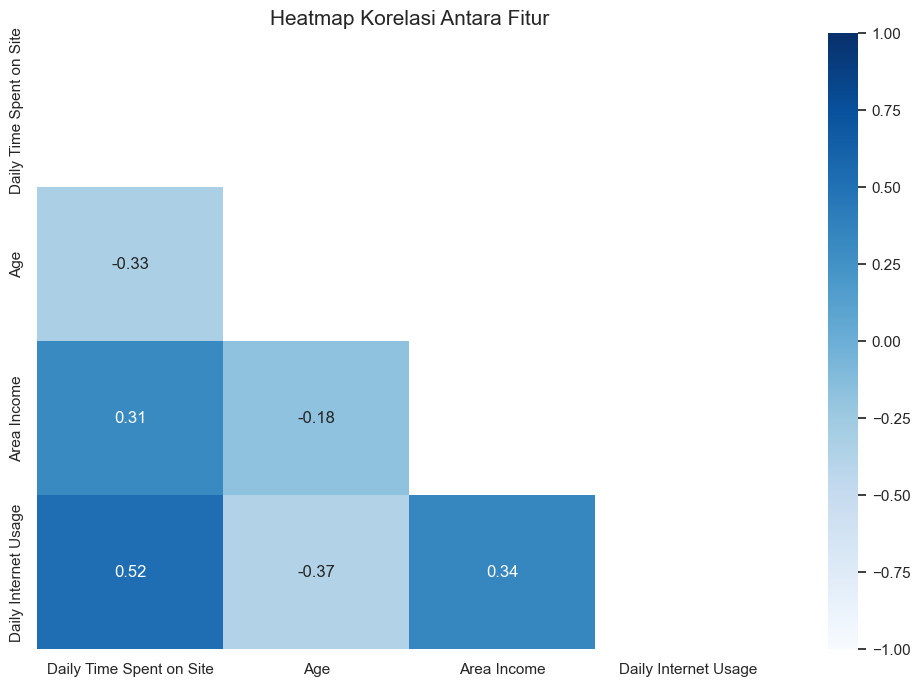

In [47]:
sns.set_style(style='white')
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Antara Fitur', fontsize = 15)

# Preprocessing

In [48]:
df_pre = df.copy()
df_pre.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


**Duplicated Data**

Tidak ada data duplikat

In [49]:
df_pre.rename(columns={'Male': 'Gender'}, inplace=True)
print('Jumlah Data Duplikat : ', df_pre.duplicated().sum())

Jumlah Data Duplikat :  0


**Handling Missing Value**

Terdapat data duplikat pada fitur Male, Daily Internet Usage, Area Income, Daily Time Spent on Site, 

In [50]:
print('Jumlah Data Duplikat : \n', df_pre.isna().sum())

Jumlah Data Duplikat : 
 Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64


In [51]:
duplikat = df_pre.isna().sum().values
df_pre.columns.values
df_duplikat = pd.DataFrame(data = duplikat, index= df_pre.columns.values, columns=['Jumlah Null']).reset_index()
df_duplikat['Ratio'] = df_duplikat['Jumlah Null'] / df_pre.shape[0] * 100
df_duplikat.rename(columns={'index': 'Column'}, inplace=True)
df_duplikat

,Column,Jumlah Null,Ratio
0,Daily Time Spent on Site,13,1.3
1,Age,0,0.0
2,Area Income,13,1.3
3,Daily Internet Usage,11,1.1
4,Gender,3,0.3
5,Timestamp,0,0.0
6,Clicked on Ad,0,0.0
7,city,0,0.0
8,province,0,0.0
9,category,0,0.0


In [52]:
df_pre = df_pre.dropna(axis=0)
print('Jumlah Data Setelah Remove Missing Value: ', df_pre.shape)

Jumlah Data Setelah Remove Missing Value:  (963, 10)


**Mengubah Tipe Data**

In [53]:
df_pre['Timestamp'] = pd.to_datetime(df_pre['Timestamp'])

In [54]:
df_pre.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance


**Remove Outlier**

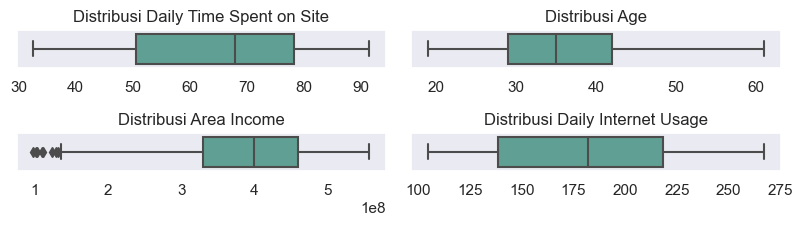

In [55]:
numeric = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
plt.figure(figsize=(8,3))
sns.set_theme(style='dark', palette='dark:#5A9_r')
for i in range(len(numeric)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df_pre, x=numeric[i])
    plt.title(f'Distribusi {numeric[i]}')
    plt.xlabel('')
plt.tight_layout()

In [56]:
df_pre.shape

(963, 10)

In [57]:
print('Data sebelum Remove Outlier : ',df_pre.shape)
q1 = df_pre['Area Income'].quantile(0.25)
q3 = df_pre['Area Income'].quantile(0.75)
iqr = q3-q1
low_limit = q1 - (1.5*iqr)
high_limit = q3 + (1.5*iqr)
df_pre = df_pre[ (df_pre['Area Income']>low_limit) & (df_pre['Area Income']<high_limit) ]
print('Data setelah Remove Outlier : ',df_pre.shape)


Data sebelum Remove Outlier :  (963, 10)
Data setelah Remove Outlier :  (955, 10)


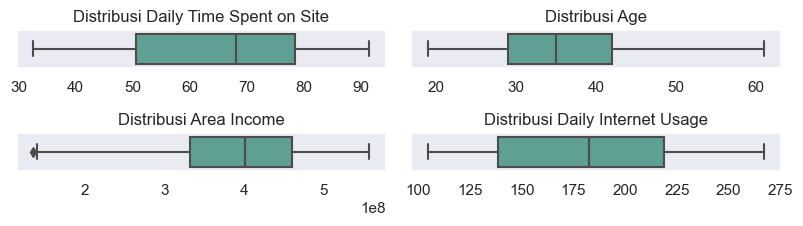

In [58]:
numeric = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
plt.figure(figsize=(8,3))
sns.set_theme(style='dark', palette='dark:#5A9_r')
for i in range(len(numeric)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df_pre, x=numeric[i])
    plt.title(f'Distribusi {numeric[i]}')
    plt.xlabel('')
plt.tight_layout()

## Feature Extraction

**Extract TimeStamp**

In [59]:
df_pre['Year'] = df_pre['Timestamp'].dt.year
df_pre['Week'] = df_pre['Timestamp'].dt.isocalendar().week
df_pre['Day'] = df_pre['Timestamp'].dt.day
df_pre['Hour'] = df_pre['Timestamp'].dt.hour

**Zona Waktu**

In [60]:
def extract_time(value):
    if value >=0 and value <=6: # Subuh
        return 1
    elif value >=6 and value <=12: # Pagi
        return 2
    elif value >=13 and value <=18: # Siang
        return 3
    elif value >=19 and value <=23: # Malam
        return 4
df_pre['Time'] = df_pre['Hour'].apply(lambda value: extract_time(value) )

## Feature Endcoding

**Endcoding Gender**

- 1 : Laki Laki
- 0 : Perempuan

In [61]:
df_pre['Gender'] = np.where(df_pre['Gender']=='Laki-Laki', 1, 0)

**Endcoding Clicked On Ad**

- 1 : Yes
- 0 : No

In [62]:
df_pre['Clicked on Ad']	= np.where(df_pre['Clicked on Ad']=='Yes', 1, 0)

**Endcoding Category**

In [63]:
category_endcode = pd.get_dummies(data=df_pre['category'])
df_pre = pd.concat([df_pre,category_endcode], axis=1)

In [64]:
df_pre.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Year,Week,Day,Hour,Time,Bank,Electronic,Fashion,Finance,Food,Furniture,Health,House,Otomotif,Travel
0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,12,27,0,1,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,Food,2016,14,4,1,1,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,2016,10,13,20,4,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House,2016,1,10,2,1,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance,2016,22,3,3,1,0,0,0,1,0,0,0,0,0,0


# Feature Selection

Text(0.5, 1.0, 'Heatmap Korelasi Antara Fitur')

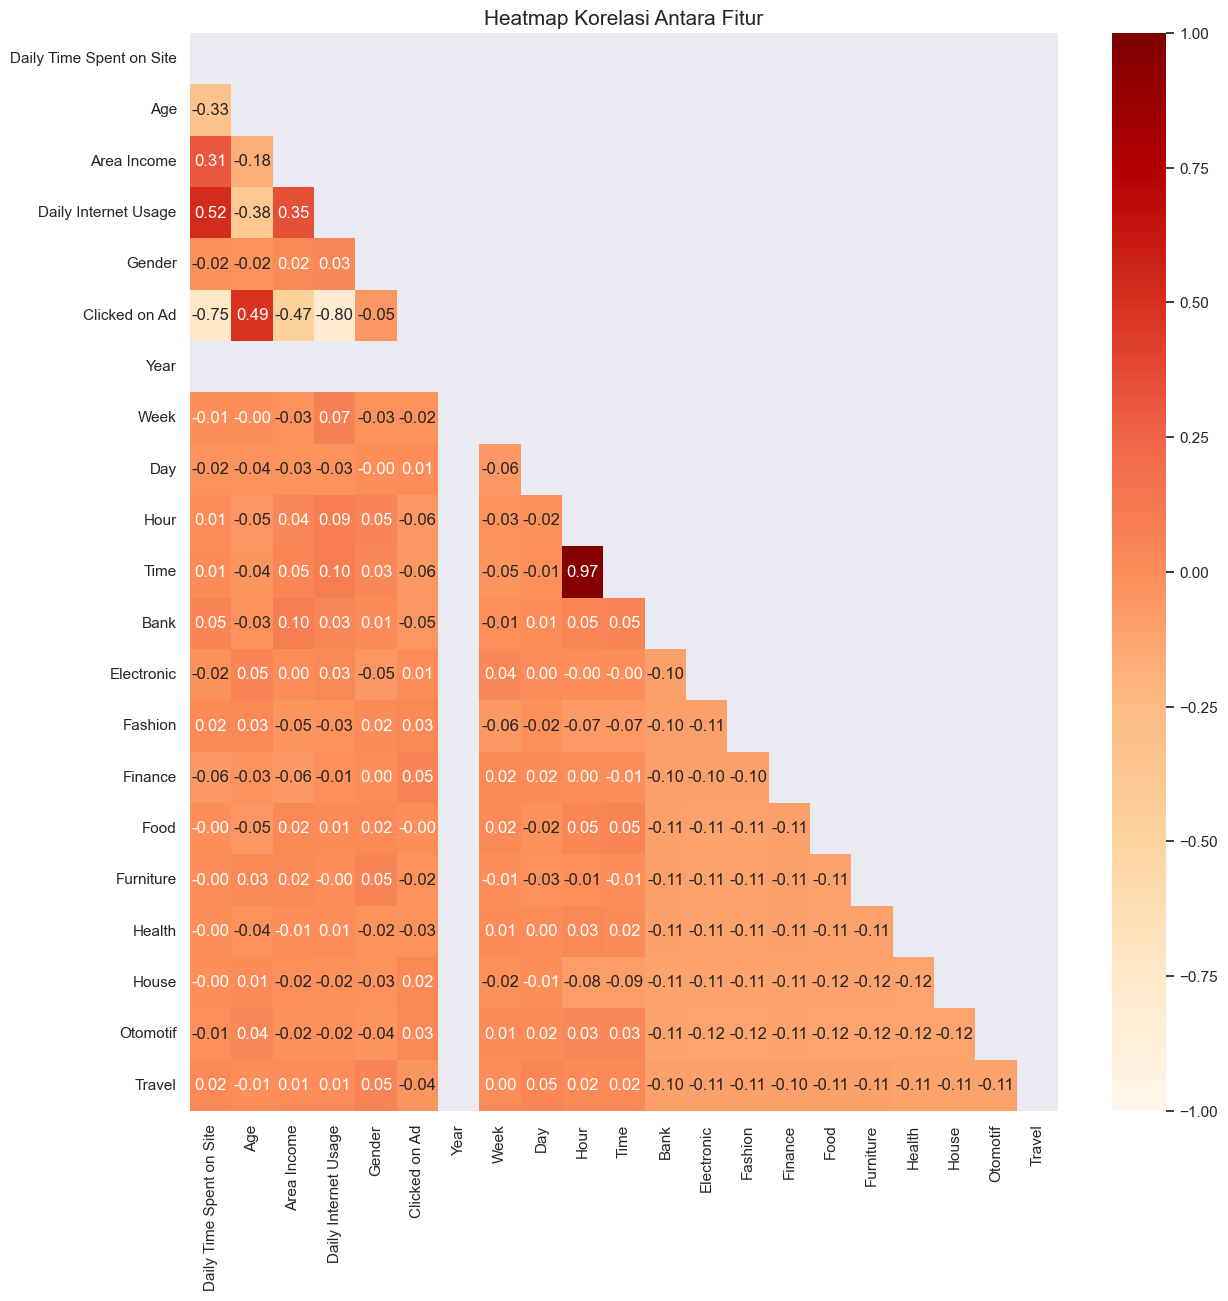

In [65]:
sns.set_style(style='dark')
plt.figure(figsize=(14,14))
mask = np.triu(np.ones_like(df_pre.corr(), dtype=np.bool))
sns.heatmap(df_pre.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='OrRd', fmt='.2f')
plt.title('Heatmap Korelasi Antara Fitur', fontsize = 15)

In [66]:
# df_selection = df_pre.drop(columns=['city','province','category','Year','Hour','Timestamp'], axis=1)
df_selection = df_pre[['Daily Time Spent on Site','Age','Area Income','Gender','Daily Internet Usage','Clicked on Ad','Day']]
df_selection.head(3)

,Daily Time Spent on Site,Age,Area Income,Gender,Daily Internet Usage,Clicked on Ad,Day
0,68.95,35,432837300.0,0,256.09,0,27
1,80.23,31,479092950.0,1,193.77,0,4
2,69.47,26,418501580.0,0,236.50,0,13


**Standarization**

In [67]:
X = df_selection.drop(columns='Clicked on Ad', axis=1)
y = df_selection[['Clicked on Ad']]

column = X.columns.values
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X[column] = SS.fit_transform(X)

In [68]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Gender,Daily Internet Usage,Day
0,0.256123,-0.116581,0.495769,-0.953939,1.737039,1.330035
1,0.964034,-0.572403,1.005425,1.048285,0.319974,-1.309248
2,0.288757,-1.142181,0.337815,-0.953939,1.291591,-0.276485
3,0.582465,-0.800314,-0.046263,1.048285,1.505106,-0.620739
4,0.219723,-0.116581,1.425627,-0.953939,1.043287,-1.423999


**Train Test Split**

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [70]:
print('X_train shape\t: ', X_train.shape)
print('X_test shape\t: ', X_test.shape)
print('y_train shape\t: ', y_train.shape)
print('y_test shape\t: ', y_test.shape)

X_train shape	:  (716, 6)
X_test shape	:  (239, 6)
y_train shape	:  (716, 1)
y_test shape	:  (239, 1)


# Modelling 1
(Dengan Normalization)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,GridSearchCV, RandomizedSearchCV

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns).reset_index()
    # ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    # ax.invert_yaxis()
    feat_importances.columns = ['feature', 'coef']
    feat_importances.sort_values(by='coef', ascending=False,inplace=True)
    sns.barplot(y=feat_importances['feature'], x=feat_importances['coef'])

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    # return feat_importances

In [72]:
def eval(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    # crosval_precision = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    crosval_accuracy = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)

    eval_metrix=pd.DataFrame({  'Matrics':["Accuracy","Recal","Precision","F1-Score","Roc_Auc","Accuracy (crossval)"],                    
                                'y_train_pred':[accuracy_score(y_train_pred,y_train),
                                                recall_score(y_train_pred,y_train),
                                                precision_score(y_train_pred,y_train),
                                                f1_score(y_train_pred,y_train),
                                                roc_auc_score(y_train, y_pred_proba_train[:, 1]),
                                                # crosval_precision['train_score'].mean(),
                                                crosval_accuracy['train_score'].mean(),
                                                ],
                                                
                                'y_test_pred':[ accuracy_score(y_test_pred,y_test),
                                                recall_score(y_test_pred,y_test),
                                                precision_score(y_test_pred,y_test),
                                                f1_score(y_test_pred,y_test),
                                                roc_auc_score(y_test, y_pred_proba_test[:, 1]),
                                                # crosval_precision['test_score'].mean(),
                                                crosval_accuracy['test_score'].mean()
                                                ]
                
                })
    return eval_metrix

## 1. Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=24)
lr.fit(X=X_train, y=y_train)
matrics_lr = eval(lr)
matrics_lr

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.972067,0.970711
1,Recal,0.980556,0.981481
2,Precision,0.964481,0.954955
3,F1-Score,0.972452,0.968037
4,Roc_Auc,0.991241,0.991906
5,Accuracy (crossval),0.970157,0.969634


In [74]:
accuracy_lr = matrics_lr
accuracy_lr = accuracy_lr[accuracy_lr['Matrics']=='Accuracy (crossval)']
accuracy_lr

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.970157,0.969634


<AxesSubplot:xlabel='coef', ylabel='feature'>

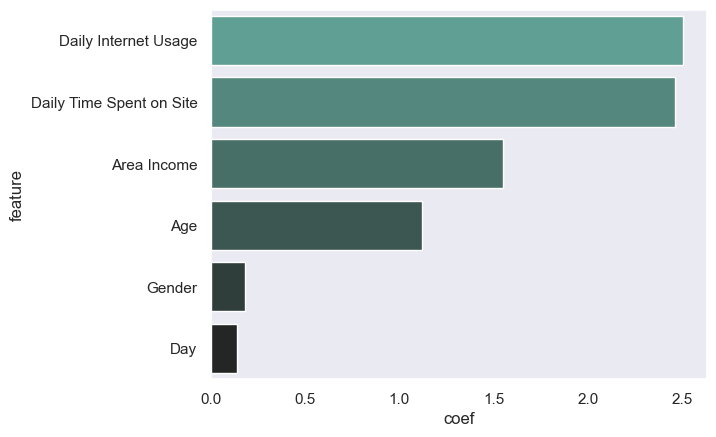

In [75]:
# Feature Importance
coef = lr.coef_[0]
feature = X_train.columns
feature_importance = pd.DataFrame(data=abs(coef), index=feature).reset_index()
feature_importance.columns = ['feature', 'coef']
feature_importance.sort_values(by='coef', ascending=False,inplace=True)
sns.barplot(y=feature_importance['feature'], x=feature_importance['coef'])

In [76]:
# Hyperparameter Tunning
hyperparameter = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # tipe regularisasi ('l1', 'l2', 'elasticnet', 'none')
    'C': np.logspace(-3, 3, 7),  # nilai inverse dari kekuatan regularisasi (semakin kecil semakin kuat)
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # algoritma yang digunakan
    'multi_class': ['auto', 'ovr', 'multinomial'],  # tipe multiclass ('auto', 'ovr', 'multinomial')
    'max_iter': [100, 200, 300]  # jumlah iterasi maksimum
}
lr = LogisticRegression(random_state=23)
gs = GridSearchCV(lr,hyperparameter,cv=5,scoring='accuracy')
gs.fit(X_train, y_train)
matrics_lr = eval(gs)
matrics_lr

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.973464,0.974895
1,Recal,0.983287,0.990654
2,Precision,0.964481,0.954955
3,F1-Score,0.973793,0.972477
4,Roc_Auc,0.991109,0.992047
5,Accuracy (crossval),0.971204,0.968586


## 2. KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)
eval(knn)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.969274,0.966527
1,Recal,0.991429,0.981308
2,Precision,0.948087,0.945946
3,F1-Score,0.969274,0.963303
4,Roc_Auc,0.997319,0.981384
5,Accuracy (crossval),0.969634,0.960209


In [78]:
hyperparameters = {
    'n_neighbors': np.arange(1, 20,2),          # nilai k dari 1 hingga 30
    'weights': ['uniform', 'distance'],      
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   # algoritma yang digunakan
    'leaf_size': [20, 30, 40, 50],          
    'p': [1, 2],                             # parameter untuk metrik jarak: 1 untuk Manhattan, 2 untuk Euclidean
}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
matrics_knn = eval(gs)
matrics_knn

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.969274,0.958159
1,Recal,0.994253,0.971963
2,Precision,0.945355,0.936937
3,F1-Score,0.969188,0.954128
4,Roc_Auc,0.996729,0.985044
5,Accuracy (crossval),0.966492,0.962304


In [79]:
accuracy_knn = matrics_knn
accuracy_knn = accuracy_knn[accuracy_knn['Matrics']=='Accuracy (crossval)']
accuracy_knn

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.966492,0.962304


## 3. Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 24)
dtree.fit(X=X_train, y=y_train)
eval(dtree)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1.0,0.958159
1,Recal,1.0,0.963303
2,Precision,1.0,0.945946
3,F1-Score,1.0,0.954545
4,Roc_Auc,1.0,0.957348
5,Accuracy (crossval),1.0,0.932984


In [81]:
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(1, 110, num = 30)] ,
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter' : ['best','random']
}
dtree = DecisionTreeClassifier(random_state = 24)
rs_dtree = RandomizedSearchCV(dtree, hyperparameters, cv = 5,scoring = 'accuracy')
rs_dtree.fit(X_train, y_train)
matrics_dt = eval(rs_dtree)
matrics_dt

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.974860,0.933054
1,Recal,0.997143,0.952381
2,Precision,0.953552,0.900901
3,F1-Score,0.974860,0.925926
4,Roc_Auc,0.998716,0.939365
5,Accuracy (crossval),0.967277,0.937173


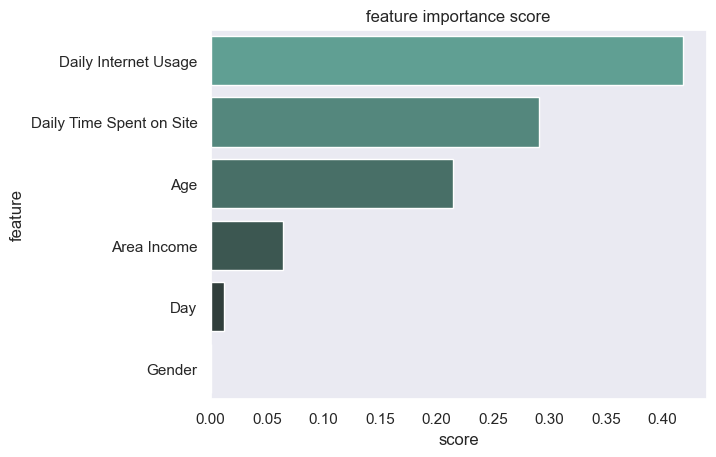

In [82]:
show_feature_importance(rs_dtree.best_estimator_)

In [83]:
accuracy_dtree = matrics_dt
accuracy_dtree = accuracy_dtree[accuracy_dtree['Matrics']=='Accuracy (crossval)']
accuracy_dtree

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.967277,0.937173


## 4. Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=24)
rf.fit(X=X_train, y= y_train)
eval(rf)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1.0,0.953975
1,Recal,1.0,0.954545
2,Precision,1.0,0.945946
3,F1-Score,1.0,0.950226
4,Roc_Auc,1.0,0.990709
5,Accuracy (crossval),1.0,0.960209


In [85]:
#Hyperparameter Tunning
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2,3,4,5,6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=24)
rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='accuracy', cv=5, random_state=12)
rs_rf.fit(X_train, y_train)
matrics_rf = eval(rs_rf)
matrics_rf

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.990223,0.966527
1,Recal,0.997230,0.972477
2,Precision,0.983607,0.954955
3,F1-Score,0.990371,0.963636
4,Roc_Auc,0.999500,0.989372
5,Accuracy (crossval),0.988743,0.960209


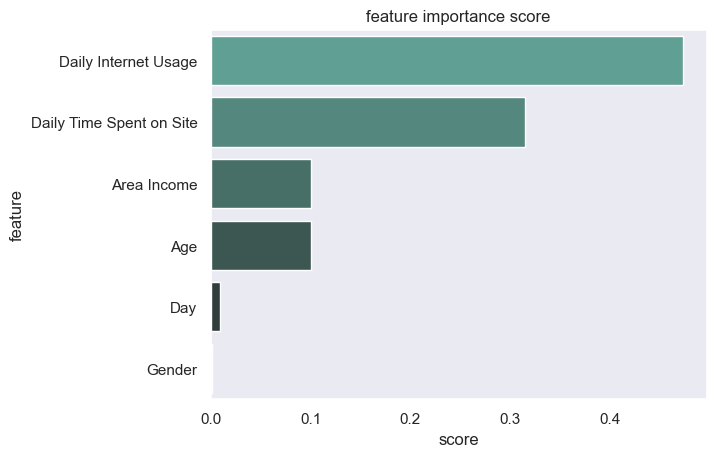

In [86]:
show_feature_importance(rs_rf.best_estimator_)

In [87]:
accuracy_rf = matrics_rf
accuracy_rf = accuracy_rf[accuracy_rf['Matrics']=='Accuracy (crossval)']
accuracy_rf

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.988743,0.960209


## 5. XGBoost

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=24)
xgb.fit(X=X_train, y= y_train)
eval(xgb)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1.0,0.958159
1,Recal,1.0,0.971963
2,Precision,1.0,0.936937
3,F1-Score,1.0,0.954128
4,Roc_Auc,1.0,0.986135
5,Accuracy (crossval),1.0,0.953927


In [89]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }
xgb = XGBClassifier(random_state=24)
rs_xgb = RandomizedSearchCV(xgb, hyperparameters,scoring='accuracy', cv=5)
rs_xgb.fit(X_train,y_train)
matrics_xgb = eval(rs_xgb)
matrics_xgb

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.979050,0.958159
1,Recal,0.986150,0.963303
2,Precision,0.972678,0.945946
3,F1-Score,0.979367,0.954545
4,Roc_Auc,0.996920,0.985677
5,Accuracy (crossval),0.979843,0.947644


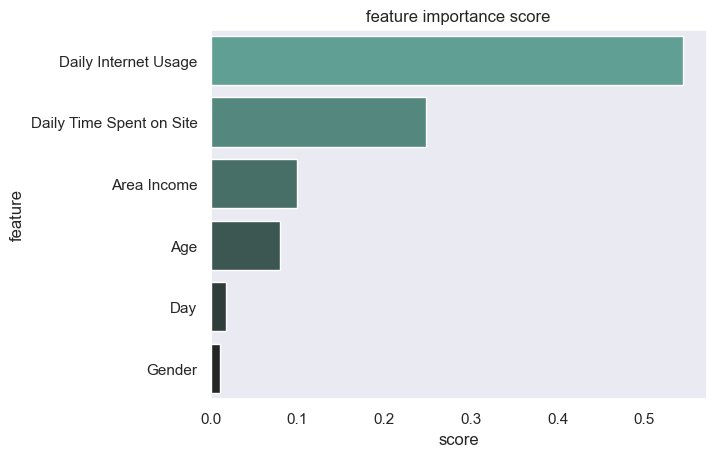

In [90]:
show_feature_importance(rs_xgb.best_estimator_)

In [91]:
accuracy_xgb = matrics_xgb
accuracy_xgb = accuracy_xgb[accuracy_xgb['Matrics']=='Accuracy (crossval)']
accuracy_xgb

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.979843,0.947644


# Modeling 2

In [122]:
X2 = df_selection.drop(columns='Clicked on Ad', axis=1)
y2 = df_selection[['Clicked on Ad']]

In [123]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=24)

In [124]:
def eval2(model):
    y_train_pred = model.predict(X_train2)
    y_test_pred = model.predict(X_test2)
    y_pred_proba_test = model.predict_proba(X_test2)
    y_pred_proba_train = model.predict_proba(X_train2)
    crosval_accuracy = cross_validate(model, X2, y2, cv=5, scoring='accuracy', return_train_score=True)

    eval_metrix=pd.DataFrame({  'Matrics':["Accuracy","Recal","Precision","F1-Score","Roc_Auc","Accuracy (crossval)"],                    
                                'y_train_pred':[accuracy_score(y_train_pred,y_train2),
                                                recall_score(y_train_pred,y_train2),
                                                precision_score(y_train_pred,y_train2),
                                                f1_score(y_train_pred,y_train2),
                                                roc_auc_score(y_train2, y_pred_proba_train[:, 1]),
                                                # crosval_precision['train_score'].mean(),
                                                crosval_accuracy['train_score'].mean(),
                                                ],
                                                
                                'y_test_pred':[ accuracy_score(y_test_pred,y_test2),
                                                recall_score(y_test_pred,y_test2),
                                                precision_score(y_test_pred,y_test2),
                                                f1_score(y_test_pred,y_test2),
                                                roc_auc_score(y_test2, y_pred_proba_test[:, 1]),
                                                # crosval_precision['test_score'].mean(),
                                                crosval_accuracy['test_score'].mean()
                                                ]
                
                })
    return eval_metrix

## 1. Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=24)
lr.fit(X=X_train2, y=y_train2)
eval2(lr)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.488827,0.535565
1,Recal,0.000000,0.000000
2,Precision,0.000000,0.000000
3,F1-Score,0.000000,0.000000
4,Roc_Auc,0.773911,0.736838
5,Accuracy (crossval),0.500524,0.500524


In [129]:
accuracy_lr_2 = eval2(lr)
accuracy_lr_2 = accuracy_lr_2[accuracy_lr_2['Matrics']=='Accuracy (crossval)']
accuracy_lr_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.500524,0.500524


## 2. KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train2, y=y_train2)
eval2(knn)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.769553,0.623431
1,Recal,0.805471,0.589744
2,Precision,0.724044,0.621622
3,F1-Score,0.762590,0.605263
4,Roc_Auc,0.861538,0.654772
5,Accuracy (crossval),0.758377,0.648168


In [131]:
hyperparameters = {
    'n_neighbors': np.arange(1, 20,2),          # nilai k dari 1 hingga 30
    'weights': ['uniform', 'distance'],      
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],   # algoritma yang digunakan
    'leaf_size': [20, 30, 40, 50],          
    'p': [1, 2],                             # parameter untuk metrik jarak: 1 untuk Manhattan, 2 untuk Euclidean
}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')
gs.fit(X=X_train2, y=y_train2)
accuracy_knn_2 = eval2(gs)
accuracy_knn_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.744413,0.640167
1,Recal,0.768328,0.610619
2,Precision,0.715847,0.621622
3,F1-Score,0.741160,0.616071
4,Roc_Auc,0.815566,0.689682
5,Accuracy (crossval),0.726963,0.687958


In [132]:
accuracy_knn_2 = accuracy_knn_2[accuracy_knn_2['Matrics']=='Accuracy (crossval)']
accuracy_knn_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.726963,0.687958


## 3. Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 24)
dtree.fit(X=X_train2, y=y_train2)
accuracy_dtree_2 = eval2(dtree)
accuracy_dtree_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1.0,0.958159
1,Recal,1.0,0.963303
2,Precision,1.0,0.945946
3,F1-Score,1.0,0.954545
4,Roc_Auc,1.0,0.957348
5,Accuracy (crossval),1.0,0.935079


In [136]:
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(1, 110, num = 30)] ,
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter' : ['best','random']
}
dtree = DecisionTreeClassifier(random_state = 24)
rs_dtree = RandomizedSearchCV(dtree, hyperparameters, cv = 5,scoring = 'accuracy')
rs_dtree.fit(X_train2, y_train2)
accuracy_dtree_2 = eval2(rs_dtree)
accuracy_dtree_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.970670,0.966527
1,Recal,0.983193,0.990476
2,Precision,0.959016,0.936937
3,F1-Score,0.970954,0.962963
4,Roc_Auc,0.994559,0.973184
5,Accuracy (crossval),0.963351,0.954974


In [137]:
accuracy_dtree_2 = accuracy_dtree_2[accuracy_dtree_2['Matrics']=='Accuracy (crossval)']
accuracy_dtree_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.963351,0.954974


## 4. Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=24)
rf.fit(X=X_train2, y= y_train2)
eval2(rf)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1.0,0.949791
1,Recal,1.0,0.945946
2,Precision,1.0,0.945946
3,F1-Score,1.0,0.945946
4,Roc_Auc,1.0,0.990674
5,Accuracy (crossval),1.0,0.960209


In [143]:
#Hyperparameter Tunning
hyperparameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2,3,4,5,6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=24)
rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='accuracy', cv=5, random_state=12)
rs_rf.fit(X=X_train2, y= y_train2)
accuracy_rf_2 = eval2(rs_rf)
accuracy_rf_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.990223,0.966527
1,Recal,0.997230,0.972477
2,Precision,0.983607,0.954955
3,F1-Score,0.990371,0.963636
4,Roc_Auc,0.999500,0.989372
5,Accuracy (crossval),0.988743,0.960209


In [144]:
accuracy_rf_2 = accuracy_rf_2[accuracy_rf_2['Matrics']=='Accuracy (crossval)']
accuracy_rf_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.988743,0.960209


## 5. XGBoost

In [145]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=24)
xgb.fit(X=X_train2, y= y_train2)
eval2(xgb)

,Matrics,y_train_pred,y_test_pred
0,Accuracy,1.0,0.958159
1,Recal,1.0,0.971963
2,Precision,1.0,0.936937
3,F1-Score,1.0,0.954128
4,Roc_Auc,1.0,0.986135
5,Accuracy (crossval),1.0,0.953927


In [146]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }
xgb = XGBClassifier(random_state=24)
rs_xgb = RandomizedSearchCV(xgb, hyperparameters,scoring='accuracy', cv=5)
rs_xgb.fit(X=X_train2, y= y_train2)
accuracy_xgb_2 = eval2(rs_xgb)
accuracy_xgb_2

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.986034,0.953975
1,Recal,0.997207,0.971698
2,Precision,0.975410,0.927928
3,F1-Score,0.986188,0.949309
4,Roc_Auc,0.998298,0.989583
5,Accuracy (crossval),0.986126,0.951832


In [147]:
accuracy_xgb_2 = accuracy_xgb_2[accuracy_xgb_2['Matrics']=='Accuracy (crossval)']
accuracy_xgb_2

,Matrics,y_train_pred,y_test_pred
5,Accuracy (crossval),0.986126,0.951832


# Model Selection
Model Terbaik adalah Logistic Regression yang mendapatkan nilai Accuracy 0.969 pada data test. Ini disebabkan Karena algoritma ini cocok digunakan untuk tugas klasifikasi biner. Nilai accuracy yang besar pada Logistic Regression ini juga dipengaruhi oleh hubungan antara fitur dependen dan independen bersifat linear dan data tidak terlalu kompleks.

In [154]:
# Experimen 2 (Tanpa Standarisasi)
matrics_eval2 = pd.concat([accuracy_lr_2,accuracy_knn_2,accuracy_dtree_2,accuracy_rf_2,accuracy_xgb_2])
matrics_eval2['Matrics'] = ['Logistic Regression','KNeighbors','DecisionTree','RandomForest','XGBClassifier']
matrics_eval2.columns = ['Model_Without_Std','Train_accuracy','Test_accuracy']
matrics_eval2.reset_index(inplace=True)
matrics_eval2.drop('index',axis=1, inplace=True)
matrics_eval2

,Model_Without_Std,Train_accuracy,Test_accuracy
0,Logistic Regression,0.500524,0.500524
1,KNeighbors,0.726963,0.687958
2,DecisionTree,0.963351,0.954974
3,RandomForest,0.988743,0.960209
4,XGBClassifier,0.986126,0.951832


In [155]:
# Experimen 1 (Dengan Standarisasi)
matrics_eval = pd.concat([accuracy_lr,accuracy_knn,accuracy_dtree,accuracy_rf,accuracy_xgb])
matrics_eval['Matrics'] = ['Logistic Regression','KNeighbors','DecisionTree','RandomForest','XGBClassifier']
matrics_eval.columns = ['Model_With_Std','Train_accuracy','Test_accuracy']
matrics_eval.reset_index(inplace=True)
matrics_eval.drop('index',axis=1, inplace=True)
matrics_eval

,Model_With_Std,Train_accuracy,Test_accuracy
0,Logistic Regression,0.970157,0.969634
1,KNeighbors,0.966492,0.962304
2,DecisionTree,0.967277,0.937173
3,RandomForest,0.988743,0.960209
4,XGBClassifier,0.979843,0.947644


In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=24)
lr.fit(X=X_train, y=y_train)
matrics_lr = eval(lr)
matrics_lr

,Matrics,y_train_pred,y_test_pred
0,Accuracy,0.972067,0.970711
1,Recal,0.980556,0.981481
2,Precision,0.964481,0.954955
3,F1-Score,0.972452,0.968037
4,Roc_Auc,0.991241,0.991906
5,Accuracy (crossval),0.970157,0.969634


In [159]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[126,   2],
       [  5, 106]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

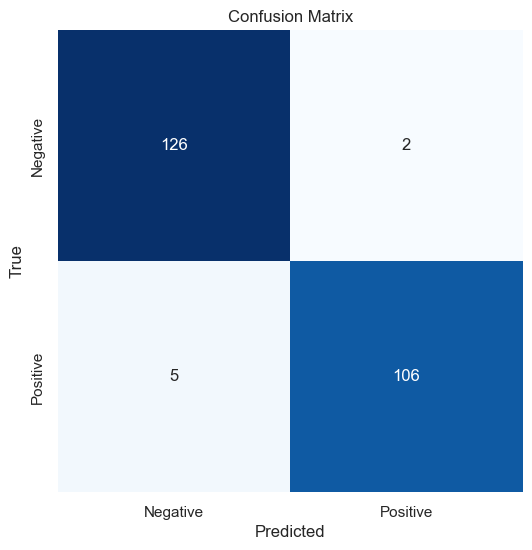

In [170]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

